In [80]:
#Sberbank is challenging to develop algorithms which use a broad spectrum of features to predict realty prices. 
#The dataset includes housing data and macroeconomic patterns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

#Read in data from the CSV file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
macro = pd.read_csv('macro.csv')

There are multiple factors due to which the prices of the houses are affected. There are multile direct factors such as how big is the house in terms of area, how many rooms does it have, which floor is the house on, etc. These are the factors that are considered in a narrow perspective.

Overall the housing prices are also affected by the economic conditions of a country. For example if we think about "inflation", if the inflation is increasing then the commodities are getting expensive and people's purchasing power is decreasing but that doesn't necessarily mean lower purchases as the people believe in buying physical assets.
If we consider interest rates - then high interest rates doesn't help when people are trying to buy houses. 

Also, these conditions doesn't take place directly it maybe a chain reaction of multiple events which may result in a particular outcome. The general population doesn't buy house immediately for most of them it is generally a long process, so the actual decision to buy a house maybe 1-2 months from actually buying it. 

How realty prices work also depends on country to country, for example in countries such as Russia where land is a scarcity the prices balloons up when a lot of people start buying properties for investments and which could have a further impact on inflation and interest rates as well. 

So these challenges makes this problem very interesting to work on. 

# Exploring the training data

In [81]:
#Display first 5 rows
train.head(5)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


We can see there are missing values which may be an issue, when we apply regression models.

In [21]:
#Listing all the columns.
print(list(train.columns))

['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_ma

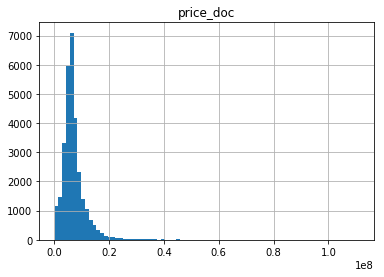

In [19]:
#Plotting the graph of price_doc - the values to be predicted 
train.hist(column='price_doc', bins=80)
plt.show();

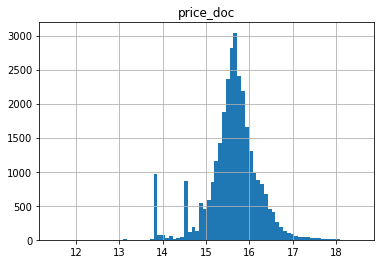

In [20]:
#We can apply log function to price_doc to remove skewness and have a uniform distribution.
train.price_doc = np.log(train.price_doc)
train.hist(column='price_doc', bins=80)
plt.show();

There is spike between 13-14 and 14-15, other than the distribution seems to be fairly okay. 

In [23]:
#We can also list out correlation of other features with price_doc
correlation = train.corr()
feature_correlation = correlation['price_doc']
feature_correlation.sort_values(ascending=False)

price_doc                         1.000000
num_room                          0.427693
full_sq                           0.271407
trc_count_5000                    0.228143
sport_count_5000                  0.223386
sport_count_3000                  0.219429
sport_count_2000                  0.213126
trc_sqm_5000                      0.210268
sport_count_1500                  0.198327
sport_objects_raion               0.196311
trc_count_3000                    0.194936
office_sqm_5000                   0.193847
trc_sqm_3000                      0.178366
school_education_centers_raion    0.174238
cafe_count_5000_price_1000        0.169323
market_count_5000                 0.162569
office_sqm_3000                   0.161593
cafe_count_5000_price_1500        0.160836
cafe_count_5000                   0.160416
ekder_male                        0.159316
cafe_count_5000_na_price          0.159282
cafe_count_5000_price_500         0.157727
trc_count_2000                    0.156443
cafe_count_

In [47]:
#Check for null values in the training data
nullPercentage = train.isnull().mean(axis=0) > 0.33
print("{:.2%} of columns have more than 33% missing values.".format(np.mean(nullPercentage)))

2.05% of columns have more than 33% missing values.


These columns are missing more than 1/3th of their data which might suggest that they may not be that informative.

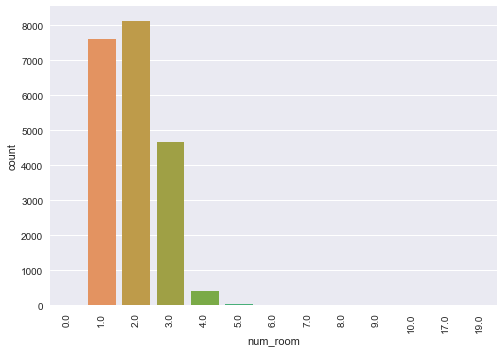

In [77]:
#Plotting the number of rooms as that is an important feature
sns.countplot(x="num_room", data=train)
plt.xticks(rotation='vertical')
plt.show()

Majority of the houses in the training data have 2 rooms.

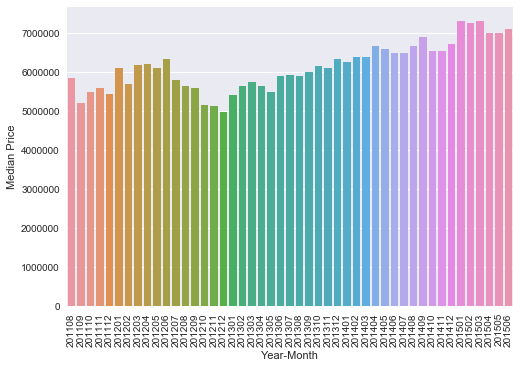

In [78]:
#Plotting the median of house prices and year-month values
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
combine = train.groupby('yearmonth')['price_doc'].aggregate(np.median).reset_index()
sns.barplot(combine.yearmonth.values, combine.price_doc.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month')
plt.ylabel('Median Price')
plt.show()

There have been changes in median prices with respect to time but nothing dramatic or a specific pattern.

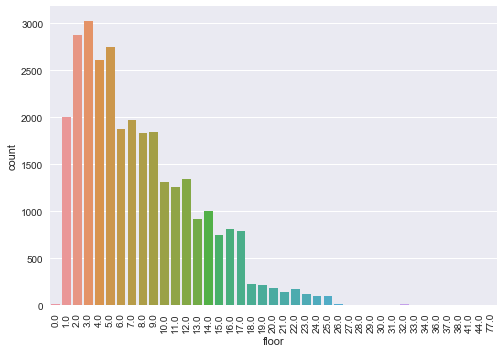

In [79]:
#Plotting floor number for all the different houses
sns.countplot(x="floor", data=train)
plt.xticks(rotation='vertical')
plt.show()

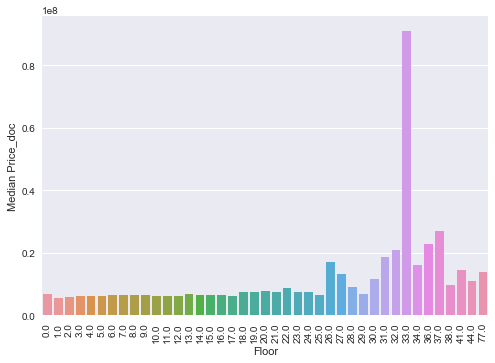

In [76]:
#Plotting the relation between floor number and price_doc
combine = train.groupby('floor')['price_doc'].aggregate(np.median).reset_index()
sns.barplot(combine.floor.values, combine.price_doc.values)
plt.xticks(rotation='vertical')
plt.xlabel('Floor')
plt.ylabel('Median Price_doc')
plt.show()

# Exploring macro data

The macro data consists different economic factors. These factors have a complex relationship with housing prices. For example if we take the inflation - when inflation increases people have lesser money to spend. Also if we see the feature salary growth which indicates how much more or less people are earning. These kinds of factors come into play when predicting the house prices. 

In [82]:
#sample macro data
macro.head(5)

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


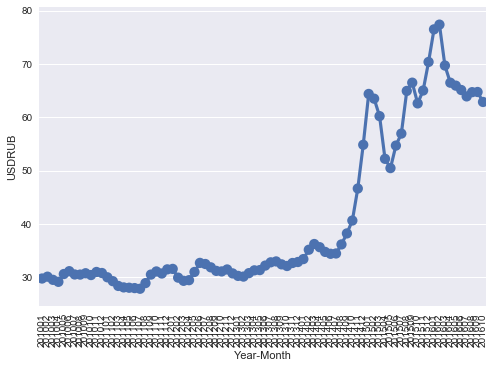

In [100]:
#Showing the general trends for usdrub over time
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
combine = macro.groupby('yearmonth')['usdrub'].aggregate(np.median).reset_index()
sns.pointplot(combine.yearmonth.values, combine.usdrub.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month')
plt.ylabel('USDRUB')
plt.show()

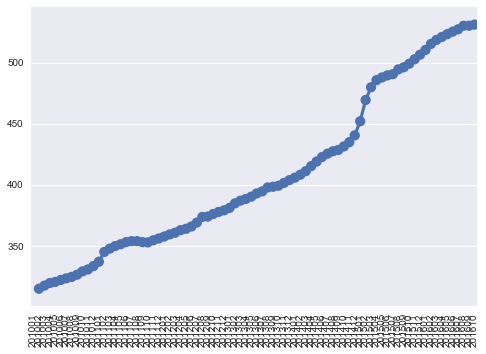

In [97]:
#Showing the general trends for Consumer Price Index over time
sns.set_style("darkgrid")
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
combine = macro.groupby('yearmonth')['cpi'].aggregate(np.median).reset_index()
sns.pointplot(combine.yearmonth.values, combine.cpi.values)
plt.xticks(rotation='vertical')
plt.show()

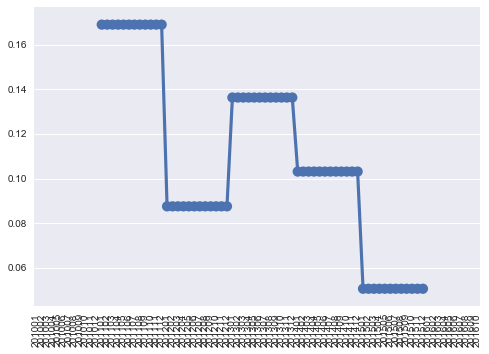

In [99]:
#Showing the general trends for Salary Growth over time
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
combine = macro.groupby('yearmonth')['salary_growth'].aggregate(np.median).reset_index()
sns.pointplot(combine.yearmonth.values, combine.salary_growth.values)
plt.xticks(rotation='vertical')
plt.show()

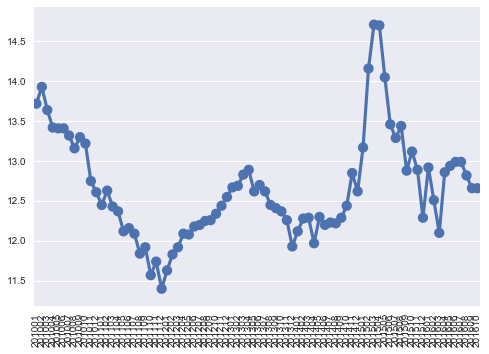

In [101]:
#Showing the general trends for Salary Growth over time
train['yearmonth'] = train['timestamp'].apply(lambda x: x[:4]+x[5:7])
combine = macro.groupby('yearmonth')['mortgage_rate'].aggregate(np.median).reset_index()
sns.pointplot(combine.yearmonth.values, combine.mortgage_rate.values)
plt.xticks(rotation='vertical')
plt.show()